# Objective:

The objective of this project is to create a machine learning model with TensorFlow to predict stock prices. We will:

### Part 1: Creating a Machine Learning Model for Stock Market Prediction

> 1. Retrieve __stock market data__ using __Yahoo Finance__. <br>
> 2. Use __Pandas__ to store and preprocess the data. <br>
> 3. Train a __deep learning model__ with TensorFlow to predict stock prices.<br>
> 4. Visualize the results with __Matplotlib__. <br>

### Part 2: Comparison of LSTM, GRU, and 1D-CNN Models for Stock Price Prediction
>1. Model training for each model <br>
>2. Performance comparison with 5 metrics <br>
    &emsp;&emsp;    -Mean Squared Error (MSE) <br>
    &emsp;&emsp;    -Root Mean Squared Error (RMSE) <br>
    &emsp;&emsp;    -Mean Absolute Error (MAE) <br>
    &emsp;&emsp;    -R² (Coefficient of Determination) <br>
    &emsp;&emsp;    -Mean Absolute Percentage Error (MAPE) <br>
>3. Visualization of the results. <br>

### Part 3: Statistical Analysis of Models
>1. Residual analysis <br>
>2. Bland-Altman analysis <br>
>3. Likelihood Ratio Test <br>
>4. Shapiro-Wilk Test <br>
>5. Cross-validation / ANOVA <br> 

# Part 1: Creating a Machine Learning Model for Stock Market Prediction

## 1. Data Collection from Yahoo Finance

In [1]:
import yfinance as yf
import pandas as pd
import scipy

# Define the stock symbol (e.g., AAPL for Apple)
stock_symbol = 'AAPL'

# Load stock market data from Yahoo Finance (e.g., last 5 years)
stock_data = yf.download(stock_symbol, start='2018-01-01', end='2023-01-01')

# Display the first rows of the data
print(stock_data.head())

# Save the data in a Pandas DataFrame
stock_data.to_csv(f'{stock_symbol}_stock_data.csv')

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-01-02  42.540001  43.075001  42.314999  43.064999  40.568935  102223600
2018-01-03  43.132500  43.637501  42.990002  43.057499  40.561863  118071600
2018-01-04  43.134998  43.367500  43.020000  43.257500  40.750267   89738400
2018-01-05  43.360001  43.842499  43.262501  43.750000  41.214214   94640000
2018-01-08  43.587502  43.902500  43.482498  43.587502  41.061153   82271200


# 2. Data Preprocessing with Pandas

To prepare the data for machine learning, we will clean it and create sequences to train a time series model. 
Steps:

    Handle missing values.
    Scale data to normalize it (since LSTM models benefit from scaled data).
    Create sequences of historical data points to predict the next value.
__LSTM Model__

In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Remove missing values
stock_data = stock_data.dropna()

# Use only 'Close' prices for prediction
closing_prices = stock_data['Close'].values
closing_prices = closing_prices.reshape(-1, 1)

# Scale data to range [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Create sequences for the model
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

# Define the sequence length (e.g., 60 days)
sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# Split into training and test data (80% training, 20% testing)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f'Training data shape: {X_train.shape}, Test data shape: {X_test.shape}')

Training data shape: (959, 60, 1), Test data shape: (240, 60, 1)


# 3. Model Training with TensorFlow

We use an LSTM (Long Short-Term Memory) model, commonly used for time series prediction as it can retain long-term dependencies. Model architecture:

    LSTM layers for processing sequential data.
    Dense layers for regression to predict share prices.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

# LSTM Model
lstm_model = Sequential()

# Add Input Layer
lstm_model.add(Input(shape=(X_train.shape[1], 1)))

# Add LSTM and Dropout Layers
lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))

# Output Layer
lstm_model.add(Dense(units=1))

# Compile the Model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
lstm_history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.1145 - val_loss: 0.0102
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0051 - val_loss: 0.0042
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0

Model summary:

    LSTM layers capture temporal dependencies in the data.
    Dropout layers help prevent overfitting.
    The model is compiled with the Adam optimizer and Mean Squared Error (MSE) as the loss function.

# 4. Visualizing Results with Matplotlib

After training the model, we can visualize how well it predicts stock prices on the test data.

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


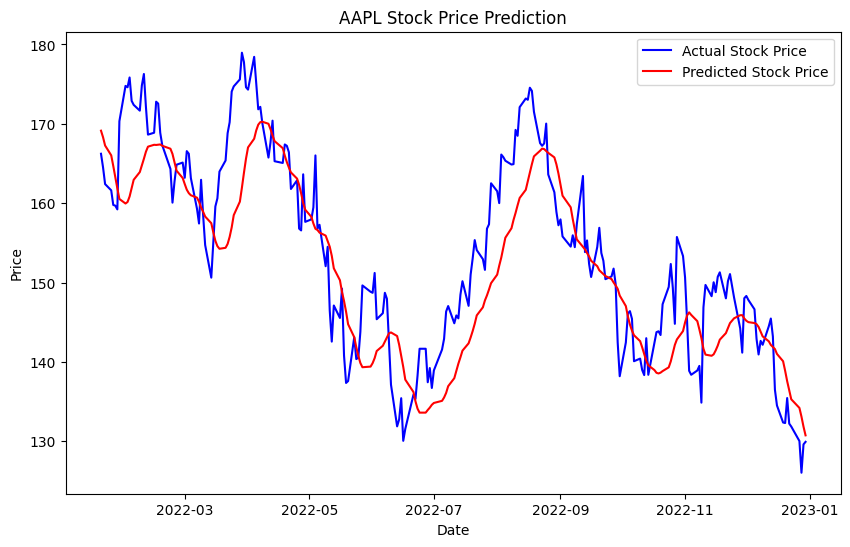

In [4]:
import matplotlib.pyplot as plt

# Prediction on test data
predicted_prices = lstm_model.predict(X_test)

# Undo scaling
predicted_prices = scaler.inverse_transform(predicted_prices)
true_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index[-len(true_prices):], true_prices, color='blue', label='Actual Stock Price')
plt.plot(stock_data.index[-len(predicted_prices):], predicted_prices, color='red', label='Predicted Stock Price')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

This chart shows the comparison between actual stock prices and predicted stock prices, allowing us to visually assess model performance.

# 5. Model Performance Evaluation

To quantify the model's performance, we calculate the Mean Squared Error (MSE) between the predicted and actual prices.

In [5]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(true_prices, predicted_prices)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 45.08226383059059


# Part 2: Comparison of LSTM, GRU, and 1D-CNN Models for Stock Price Prediction

Overview Data collection and preprocessing (identical to previous section). Models:

    LSTM model
    GRU model
    Combination of 1D-CNN and LSTM

Model training for each model. Performance comparison with 5 metrics:

    Mean Squared Error (MSE)
    Root Mean Squared Error (RMSE)
    Mean Absolute Error (MAE)
    R² (Coefficient of Determination)
    Mean Absolute Percentage Error (MAPE)

Result visualization.

__GRU Model__

The GRU model is an alternative to LSTM, often training faster due to lower complexity. We implement a GRU model here:

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input

# GRU Model
gru_model = Sequential()

# Add Input Layer
gru_model.add(Input(shape=(X_train.shape[1], 1)))

# Add GRU and Dropout Layers
gru_model.add(GRU(units=50, return_sequences=True))
gru_model.add(Dropout(0.2))

gru_model.add(GRU(units=50, return_sequences=False))
gru_model.add(Dropout(0.2))

# Output Layer
gru_model.add(Dense(units=1))

# Compile the Model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
gru_history = gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0717 - val_loss: 0.0077
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0038 - val_loss: 0.0026
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0029 - val_loss: 0.0012
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0

__Combined 1D-CNN and LSTM Model__

In this model, we combine a 1D-CNN (Convolutional Layer) for feature extraction with an LSTM to capture temporal dependencies.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense, Input

# 1D-CNN and LSTM model
cnn_lstm_model = Sequential()

# Add Input Layer
cnn_lstm_model.add(Input(shape=(X_train.shape[1], 1)))

# 1D Convolutional Layer
cnn_lstm_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))

# LSTM Layer
cnn_lstm_model.add(LSTM(units=50, return_sequences=False))
cnn_lstm_model.add(Dropout(0.2))

# Dense layer for prediction
cnn_lstm_model.add(Dense(units=1))

# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
cnn_lstm_history = cnn_lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0521 - val_loss: 0.0038
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0021 - val_loss: 0.0036
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0

# 3. Performance Evaluation and Comparison

We compare the models using the following metrics:


    Mean Squared Error (MSE): Represents the average squared difference between predicted and actual values.
    Root Mean Squared Error (RMSE): Square root of MSE, interpreted in the same units as the target variable.
    Mean Absolute Error (MAE): The average absolute error.
    R² (Coefficient of Determination): A measure of how well predictions match the actual values.
    Mean Absolute Percentage Error (MAPE): The average percentage error.

__Model Evaluation:__

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Metric calculation for each model
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mse, rmse, mae, r2, mape

# Predictions for LSTM
lstm_pred = lstm_model.predict(X_test)
lstm_mse, lstm_rmse, lstm_mae, lstm_r2, lstm_mape = evaluate(y_test, lstm_pred)

# Predictions for GRU
gru_pred = gru_model.predict(X_test)
gru_mse, gru_rmse, gru_mae, gru_r2, gru_mape = evaluate(y_test, gru_pred)

# Predictions for CNN-LSTM
cnn_lstm_pred = cnn_lstm_model.predict(X_test)
cnn_lstm_mse, cnn_lstm_rmse, cnn_lstm_mae, cnn_lstm_r2, cnn_lstm_mape = evaluate(y_test, cnn_lstm_pred)

# Display results
print(f"LSTM Model: MSE={lstm_mse}, RMSE={lstm_rmse}, MAE={lstm_mae}, R2={lstm_r2}, MAPE={lstm_mape}")
print(f"GRU Model: MSE={gru_mse}, RMSE={gru_rmse}, MAE={gru_mae}, R2={gru_r2}, MAPE={gru_mape}")
print(f"CNN-LSTM Model: MSE={cnn_lstm_mse}, RMSE={cnn_lstm_rmse}, MAE={cnn_lstm_mae}, R2={cnn_lstm_r2}, MAPE={cnn_lstm_mape}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
LSTM Model: MSE=0.0021016127538060103, RMSE=0.04584335015905808, MAE=0.03737929758643885, R2=0.7157904775622957, MAPE=4.59868191826461
GRU Model: MSE=0.0011870300336442033, RMSE=0.03445330221682971, MAE=0.02814289818574518, R2=0.8394731672758151, MAPE=3.5611769639930917
CNN-LSTM Model: MSE=0.0017470701611226433, RMSE=0.04179796838510986, MAE=0.0354282347189898, R2=0.763736694470183, MAPE=4.4366426048818814


# 4. Result Visualization

To visualize each model's predictions, we can plot the actual and predicted stock prices side-by-side.

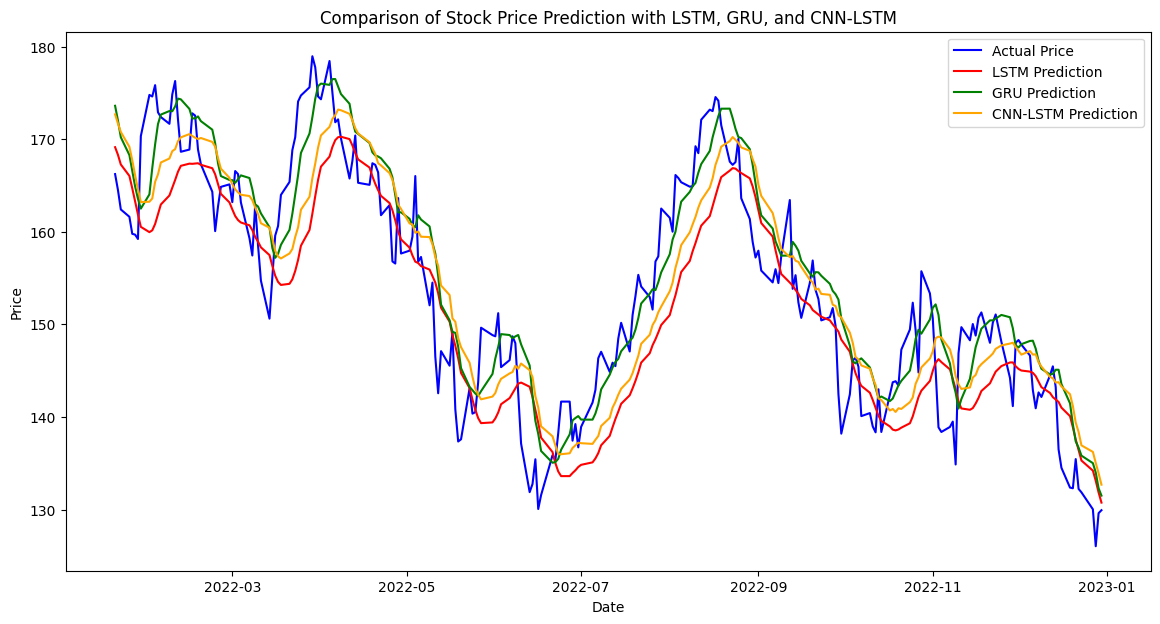

In [9]:
import matplotlib.pyplot as plt

# Visualization of predictions for LSTM, GRU, and CNN-LSTM
plt.figure(figsize=(14, 7))

plt.plot(stock_data.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Actual Price')

# LSTM Predictions
plt.plot(stock_data.index[-len(lstm_pred):], scaler.inverse_transform(lstm_pred), color='red', label='LSTM Prediction')

# GRU Predictions
plt.plot(stock_data.index[-len(gru_pred):], scaler.inverse_transform(gru_pred), color='green', label='GRU Prediction')

# CNN-LSTM Predictions
plt.plot(stock_data.index[-len(cnn_lstm_pred):], scaler.inverse_transform(cnn_lstm_pred), color='orange', label='CNN-LSTM Prediction')

plt.title('Comparison of Stock Price Prediction with LSTM, GRU, and CNN-LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Part 3: Statistical Analysis of Models

## 1. Residual Analysis

Residuals are the differences between actual and predicted values. Analyzing residuals can provide valuable insights into how well a model captures the data.

Possible analyses:

    Residual histogram: Check if residuals are normally distributed. A well-fitted model should have randomly distributed residuals centered around zero.
    Q-Q Plot: A Quantile-Quantile plot compares the distribution of residuals with a normal distribution. Deviations indicate systematic errors.
    Autocorrelation of residuals: For time series models, you can use the Autocorrelation Function (ACF) of the residuals to see if there is dependency in the errors. A good model should not have significant autocorrelation in the residuals.

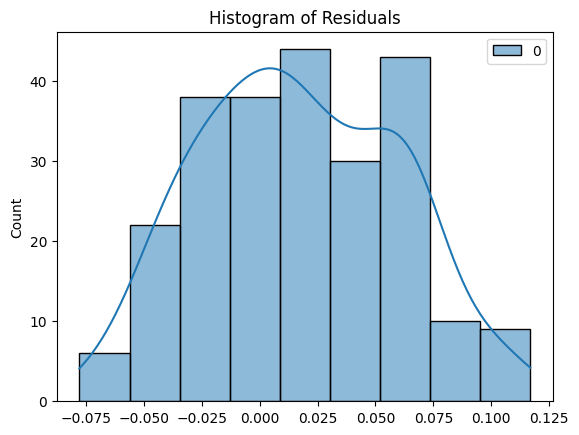

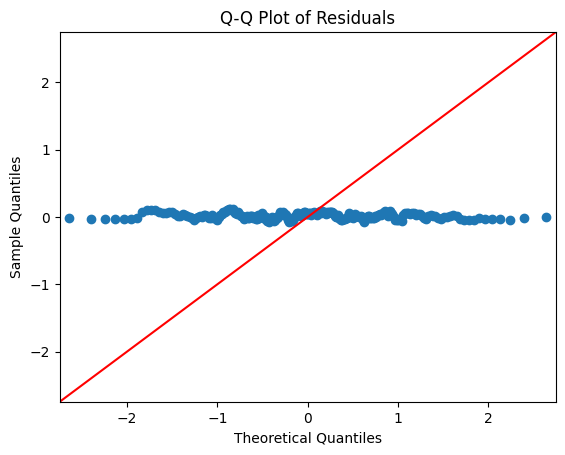

In [10]:
import seaborn as sns
import statsmodels.api as sm

# Calculate residuals for LSTM model
residuals = y_test - lstm_pred

# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

## 2. Bland-Altman Analysis

The Bland-Altman analysis (or difference plot) is a graphical method to compare two measurement methods. It is particularly useful if you want to compare two models to see how their predictions differ from each other.

Steps:

    Plot the differences between the predictions of two models against their averages.
    Analyze whether the differences are significant or appear randomly distributed.

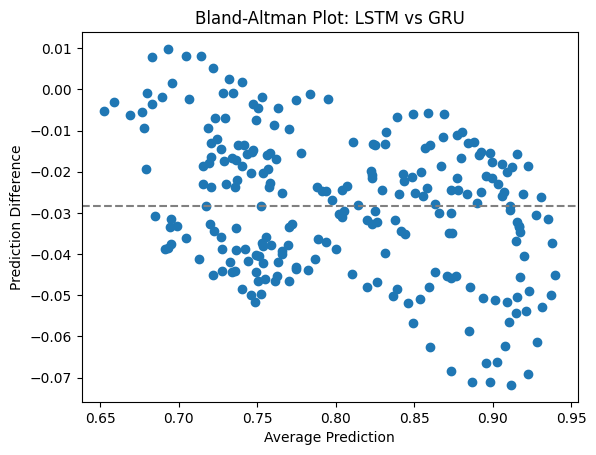

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Means and differences of predictions from two models
mean_predictions = np.mean([lstm_pred, gru_pred], axis=0)
diff_predictions = lstm_pred - gru_pred

plt.scatter(mean_predictions, diff_predictions)
plt.axhline(np.mean(diff_predictions), color='gray', linestyle='--')
plt.title('Bland-Altman Plot: LSTM vs GRU')
plt.xlabel('Average Prediction')
plt.ylabel('Prediction Difference')
plt.show()

## 3. Likelihood-Based Tests (Likelihood Ratio Test)

The Likelihood Ratio Test (LRT) compares the goodness of fit of two models based on their likelihoods. You can use LRT to test whether adding extra parameters to a model brings significant improvements.

Steps:

    Calculate the log-likelihood for each model.
    Compare the model likelihoods to see if one fits significantly better.

In [12]:
# Log-likelihood calculation for two models
ll_lstm = np.sum(scipy.stats.norm.logpdf(y_test, loc=lstm_pred))
ll_gru = np.sum(scipy.stats.norm.logpdf(y_test, loc=gru_pred))

# Likelihood Ratio Test
LRT_stat = -2 * (ll_lstm - ll_gru)
p_value = scipy.stats.chi2.sf(LRT_stat, df=1)  # df = difference in degrees of freedom
print(f'Likelihood Ratio Test Statistic: {LRT_stat}, P-value: {p_value}')

Likelihood Ratio Test Statistic: 0.21949985283879414, P-value: 0.6394212699042499


## 4. Shapiro-Wilk Test (Normality Test)

Check the normality of residuals using the Shapiro-Wilk test. Many statistical tests and models assume normally distributed residuals. If they deviate significantly from a normal distribution, it could indicate systematic errors or model deficiencies.

In [13]:
from scipy.stats import shapiro

# Normality test for residuals
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk Test Statistic: {stat}, P-value: {p_value}')

Shapiro-Wilk Test Statistic: 0.9860106706619263, P-value: 0.01883181743323803


## 5. Cross-Validation / ANOVA

Cross-validation is a method to evaluate the generalizability of models. For time series data, a Time Series Split cross-validation could be performed to ensure that models perform well not only on the training data but also on new data.

In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize KFold Cross-Validation
kf = KFold(n_splits=5)

# Lists to store MSE values
mse_lstm = []
mse_gru = []
mse_cnn_lstm = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train and evaluate each model
    lstm_model.fit(X_train, y_train)
    gru_model.fit(X_train, y_train)
    cnn_lstm_model.fit(X_train, y_train)
    
    lstm_pred = lstm_model.predict(X_test)
    gru_pred = gru_model.predict(X_test)
    cnn_lstm_pred = cnn_lstm_model.predict(X_test)
    
    # Store MSE values
    mse_lstm.append(mean_squared_error(y_test, lstm_pred))
    mse_gru.append(mean_squared_error(y_test, gru_pred))
    mse_cnn_lstm.append(mean_squared_error(y_test, cnn_lstm_pred))

# Perform ANOVA Test
anova_result = scipy.stats.f_oneway(mse_lstm, mse_gru, mse_cnn_lstm)
print('ANOVA Result:', anova_result)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0037
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0032
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0032
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0038
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0030
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0032
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0026
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0025
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0025
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0020
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0021
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.001

# Summary of Statistical Investigation Methods:

    Residual Analysis: Identifies potential model errors and irregularities.
    Bland-Altman Analysis: Graphical comparison of models.
    Likelihood Ratio Test: Comparison of model fit via likelihoods.
    Shapiro-Wilk Test: Test for normality of residuals.
    Cross-Validation: Evaluation of model generalizability.
    ANOVA and Pairwise T-Test: Comparison of different model performances and testing for significant differences.

These methods help deeply analyze model performance and draw informed conclusions about which model is best suited and how it can be further improved.